# Aufgabe 19: DeepLearning Kurzfragen
### a) Was beschreibt die Loss-Funktion und wofür wird sie benötigt?
Die Loss-Funktion ist ein Abstandsmaß und gibt daher an, wie sehr sich der Output eines Klassifikators vom gewünschten Output (also den Labels der Trainingsdaten) unterscheidet. Dieses Maß wird benötigt, da im Training der Loss minimiert wird. 
### b) Wie kann die Loss-Funktion minimiert werden?
Indem durch Training und anschließenden Gradientenabstieg der Lossfunktion die Parameter optimiert werden.
### c) Welche Funktion haben die Aktivierungsfunktionen bzw. welches Problem wird durch diese gelöst? Nennen Sie drei gängige Aktivierungsfunktionen.
Die Aktivierungsfunktionen stellen den Zusammenhang zwischen dem Netz-Input und der Aktivität eines Neurons dar.  
Beispiele: ReLU, tanh, Sigmoid.
### d) Was ist ein Neuron?
Ein Neuron ist eine elementare Einheit eines künstlichen Neuronalen Netzes. 
### e) Nennen Sie drei Anwendungsbeispiele für Neuronale Netze und beschreiben Sie kurz, warum sie für diese             Beispiele besonders geeignet sind.
Klassifizierung in hochdimensionalen Problemen der Teilchenphysik, Bilderkennung, Spracherkennung.

# Aufgabe 20: Lineare Klassifizierung mit Softmax-Funktion

### a) Gegeben seien 𝐾 Klassen und 𝑚 Beispiele $x_i$ jeweils mit 𝑀 Komponenten. Welche Dimension haben die folgenden Komponenten?

$x_i$: $(M\times 1)$,  
$C$: $(1\times 1)$,  
$W$: $(K\times M)$,  
$b$: $(K\times 1)$,  
$\nabla_W C$: $(K\times M)$, damit wird ja später W korrigiert,  
$\nabla_{f_i} C$: $(K\times 1)$,  
$\frac{df_{k,i}}{dW}$: $(1 \times M)$,  
$\frac{df_{k,i}}{db}$: $(M \times 1)$,

### d)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
populations = pd.read_hdf('populations.hdf5', key='pops')
from sklearn.utils import shuffle
populations = shuffle(populations).reset_index()

In [3]:
populations.head()

,index,x,y,label
0,3174,-1.923532,2.368312,0
1,6446,-9.579875,-2.498423,0
2,501,-0.937046,4.358011,0
3,17987,7.102807,3.670820,1
4,774,3.788250,7.258256,0


**Design-Matrix X und Target-Vektor y**

In [4]:
x_pop = populations['x'].values
y_pop = populations['y'].values
X = np.array([x_pop, y_pop]).T
y0 = populations['label'].values

In [7]:
y0

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [8]:
from keras.utils import to_categorical
y = to_categorical(y0)
#hätte man auch händisch machen können, aber das hier ist die Kurzform

Using TensorFlow backend.


In [9]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [10]:
def softmax(W, point, b):
    f = W@point.reshape(2,1) + b
    soft = np.exp(f) / np.sum(np.exp(f), axis=0)
    return soft.reshape(2,1)

def grad_W_C(point, targetvector):
   return (softmax(weight, point, bias)-targetvector.reshape(2,1))*point.reshape(1,2) 

def grad_b_C(point, targetvector):
   return softmax(weight, point, bias)-targetvector.reshape(2,1)

# Klassifizierer

Hier die Kurzform:

Periode 1 abgeschlossen.
Periode 2 abgeschlossen.
Periode 3 abgeschlossen.
Periode 4 abgeschlossen.
Periode 5 abgeschlossen.
Periode 6 abgeschlossen.
Periode 7 abgeschlossen.
Periode 8 abgeschlossen.
Periode 9 abgeschlossen.
Periode 10 abgeschlossen.


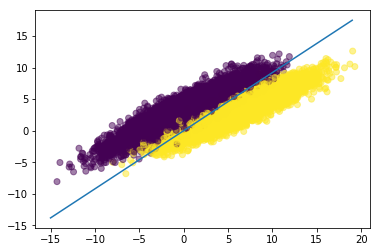

In [15]:
np.random.seed(5)
weight = np.random.rand(2,2)
bias = np.random.rand(2,1)

periods = 10
learning_rate = .5
for period in range(periods):
    W_corr = np.array([[0.,0.],[0.,0.]])
    b_corr = np.array([[0.0],[0.0]])
    for i in range(0, len(populations)):
        W_corr += grad_W_C(X[i], y[i])
        b_corr += grad_b_C(X[i], y[i])
    weight = weight - 1/len(populations)*learning_rate * W_corr
    bias = bias - 1/len(populations)*learning_rate * b_corr
    print('Periode {} abgeschlossen.' .format(period+1))

m = (weight[1,0] - weight[0,0]) / (weight[0,1] - weight[1,1])
b = (bias[1] - bias[0]) / (weight[0,1] - weight[1,1])
x = np.arange(-15,20,1)

plt.scatter(X.T[0], X.T[1], c=np.argmax(y, axis=1), alpha = 0.5)
plt.plot(x, m*x+b, label=period)

Die trennende Gerade ist $$ y = \frac{W_{21} - W_{11}}{ W_{12} - W_{22} }x + \frac{b_{2} - b_{1}}{ W_{12} - W_{22} } $$
und folgt aus der Bedingung $y_1 = y_2$.

Jetzt mit ein paar Plots und Loss:

Periode 1 abgeschlossen.
Periode 2 abgeschlossen.
Periode 3 abgeschlossen.
Periode 4 abgeschlossen.
Periode 5 abgeschlossen.
Periode 6 abgeschlossen.
Periode 7 abgeschlossen.
Periode 8 abgeschlossen.
Periode 9 abgeschlossen.
Periode 10 abgeschlossen.


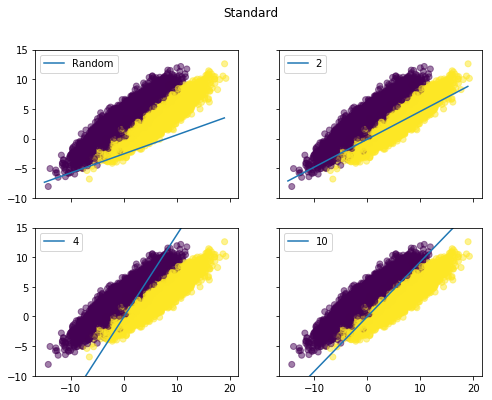

Learning Rate: 0.5, 
 Loss: [0.09934539].


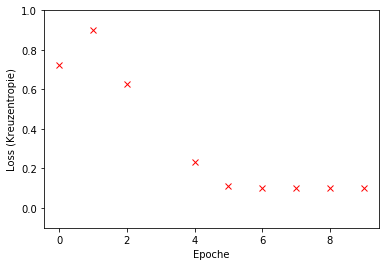

In [12]:
np.random.seed(5)
weight = np.random.rand(2,2)
bias = np.random.rand(2,1)

m = (weight[1,0] - weight[0,0]) / (weight[0,1] - weight[1,1])
b = (bias[1] - bias[0]) / (weight[0,1] - weight[1,1])
x = np.arange(-15,20,1)

fig, ax = plt.subplots(2,2,sharex=True,sharey=True, figsize=(8,6))
fig.suptitle('Standard')
ax[0,0].scatter(X.T[0], X.T[1], c=np.argmax(y, axis=1), alpha = 0.5)
ax[0,1].scatter(X.T[0], X.T[1], c=np.argmax(y, axis=1), alpha = 0.5)
ax[1,0].scatter(X.T[0], X.T[1], c=np.argmax(y, axis=1), alpha = 0.5)
ax[1,1].scatter(X.T[0], X.T[1], c=np.argmax(y, axis=1), alpha = 0.5)
ax[0,0].set_ylim(-10,15)
ax[0,0].plot(x, m*x+b, label='Random')
ax[0,0].legend()

periods = 10
learning_rate = .5
Loss = []

for period in range(periods):
    if period == 1 or period==3:
        W_corr = np.array([[0.,0.],[0.,0.]])
        b_corr = np.array([[0.0],[0.0]])
        loss = 0
        for i in range(0, len(populations)):
            W_corr += grad_W_C(X[i], y[i])
            b_corr += grad_b_C(X[i], y[i])
            loss += sum(-y[i].reshape(2,1)*np.log(softmax(weight, X[i], bias)))
        weight = weight - 1/len(populations)*learning_rate * W_corr
        bias = bias - 1/len(populations)*learning_rate * b_corr
        m = (weight[1,0] - weight[0,0]) / (weight[0,1] - weight[1,1])
        b = (bias[1] - bias[0]) / (weight[0,1] - weight[1,1])
        x = np.arange(-15,20,1)
        if period ==1:
            ax[0,1].plot(x, m*x+b, label=period+1)
            ax[0,1].legend()
            print('Periode {} abgeschlossen.' .format(period+1))
        else: 
            ax[1,0].plot(x, m*x+b, label=period+1)
            ax[1,0].legend()
            print('Periode {} abgeschlossen.' .format(period+1))
        Loss.append(1/len(populations)* loss)
    else: 
        W_corr = np.array([[0.,0.],[0.,0.]])
        b_corr = np.array([[0.0],[0.0]])
        loss = 0
        for i in range(0, len(populations)):
            W_corr += grad_W_C(X[i], y[i])
            b_corr += grad_b_C(X[i], y[i])
            loss += sum(-y[i].reshape(2,1)*np.log(softmax(weight, X[i], bias)))
        weight = weight - 1/len(populations)*learning_rate * W_corr
        bias = bias - 1/len(populations)*learning_rate * b_corr
        print('Periode {} abgeschlossen.' .format(period+1))
        Loss.append(1/len(populations)* loss)
        
m = (weight[1,0] - weight[0,0]) / (weight[0,1] - weight[1,1])
b = (bias[1] - bias[0]) / (weight[0,1] - weight[1,1])
x = np.arange(-15,20,1)
ax[1,1].plot(x, m*x+b, label=period+1)
ax[1,1].legend()
plt.show()
plt.plot(Loss, 'rx')
plt.xlabel('Epoche')
plt.ylabel('Loss (Kreuzentropie)')
plt.ylim(-.1,1)
print('Learning Rate: {}, \n Loss: {}.'.format(learning_rate, Loss[-1]))

# Jetzt mit Learning Rate Decay  

Periode 1 abgeschlossen.
Periode 2 abgeschlossen.
Periode 3 abgeschlossen.
Periode 4 abgeschlossen.
Periode 5 abgeschlossen.
Periode 6 abgeschlossen.
Periode 7 abgeschlossen.
Periode 8 abgeschlossen.
Periode 9 abgeschlossen.
Periode 10 abgeschlossen.


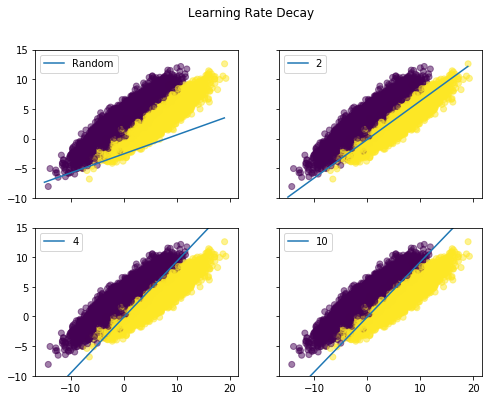

Learning Rate: 0.10737418240000006, 
 Loss: [0.09805599].


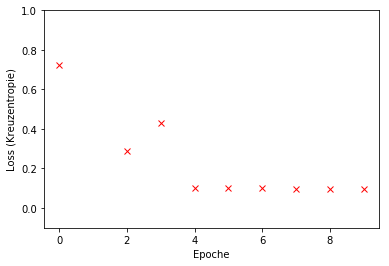

In [13]:
np.random.seed(5)
weight = np.random.rand(2,2)
bias = np.random.rand(2,1)

m = (weight[1,0] - weight[0,0]) / (weight[0,1] - weight[1,1])
b = (bias[1] - bias[0]) / (weight[0,1] - weight[1,1])
x = np.arange(-15,20,1)

fig, ax = plt.subplots(2,2,sharex=True,sharey=True, figsize=(8,6))
fig.suptitle('Learning Rate Decay')
ax[0,0].scatter(X.T[0], X.T[1], c=np.argmax(y, axis=1), alpha = 0.5)
ax[0,1].scatter(X.T[0], X.T[1], c=np.argmax(y, axis=1), alpha = 0.5)
ax[1,0].scatter(X.T[0], X.T[1], c=np.argmax(y, axis=1), alpha = 0.5)
ax[1,1].scatter(X.T[0], X.T[1], c=np.argmax(y, axis=1), alpha = 0.5)
ax[0,0].set_ylim(-10,15)
ax[0,0].plot(x, m*x+b, label='Random')
ax[0,0].legend()

periods = 10
learning_rate = 1
decay = .8
Loss = []

for period in range(periods):
    if period == 1 or period==3:
        W_corr = np.array([[0.,0.],[0.,0.]])
        b_corr = np.array([[0.0],[0.0]])
        loss = 0
        for i in range(0, len(populations)):
            W_corr += grad_W_C(X[i], y[i])
            b_corr += grad_b_C(X[i], y[i])
            loss += sum(-y[i].reshape(2,1)*np.log(softmax(weight, X[i], bias)))
        weight = weight - 1/len(populations)*learning_rate * W_corr
        bias = bias - 1/len(populations)*learning_rate * b_corr
        m = (weight[1,0] - weight[0,0]) / (weight[0,1] - weight[1,1])
        b = (bias[1] - bias[0]) / (weight[0,1] - weight[1,1])
        x = np.arange(-15,20,1)
        if period ==1:
            ax[0,1].plot(x, m*x+b, label=period+1)
            ax[0,1].legend()
            print('Periode {} abgeschlossen.' .format(period+1))
        else: 
            ax[1,0].plot(x, m*x+b, label=period+1)
            ax[1,0].legend()
            print('Periode {} abgeschlossen.' .format(period+1))
        learning_rate *= decay
        Loss.append(1/len(populations)* loss)
    else: 
        W_corr = np.array([[0.,0.],[0.,0.]])
        b_corr = np.array([[0.0],[0.0]])
        loss = 0
        for i in range(0, len(populations)):
            W_corr += grad_W_C(X[i], y[i])
            b_corr += grad_b_C(X[i], y[i])
            loss += sum(-y[i].reshape(2,1)*np.log(softmax(weight, X[i], bias)))
        weight = weight - 1/len(populations)*learning_rate * W_corr
        bias = bias - 1/len(populations)*learning_rate * b_corr
        print('Periode {} abgeschlossen.' .format(period+1))
        learning_rate *= decay
        Loss.append(1/len(populations)* loss)
        
m = (weight[1,0] - weight[0,0]) / (weight[0,1] - weight[1,1])
b = (bias[1] - bias[0]) / (weight[0,1] - weight[1,1])
x = np.arange(-15,20,1)
ax[1,1].plot(x, m*x+b, label=period+1)
ax[1,1].legend()
plt.show()

plt.plot(Loss, 'rx')
plt.xlabel('Epoche')
plt.ylabel('Loss (Kreuzentropie)')
plt.ylim(-.1,1)
print('Learning Rate: {}, \n Loss: {}.'.format(learning_rate, Loss[-1]))

##### Bis hierhin wurde der sogenannte Batch Gradient Descent verwendet, bei dem die Batch Size die Länge des Datensatzes ist.  
# Jetzt: Kleinere Batch Size, also sog. Mini Batch Gradient Descent.  
**Wie man sieht viel schnellere Konvergenz!**

Periode 1 abgeschlossen.
Periode 2 abgeschlossen.
Periode 3 abgeschlossen.
Periode 4 abgeschlossen.
Periode 5 abgeschlossen.
Periode 6 abgeschlossen.
Periode 7 abgeschlossen.
Periode 8 abgeschlossen.
Periode 9 abgeschlossen.
Periode 10 abgeschlossen.


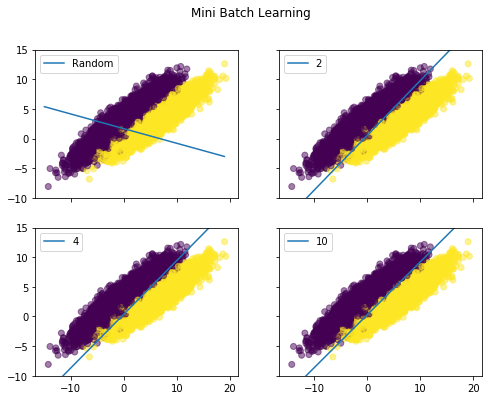

Learning Rate: 0.5, 
 Loss: [0.11484502].


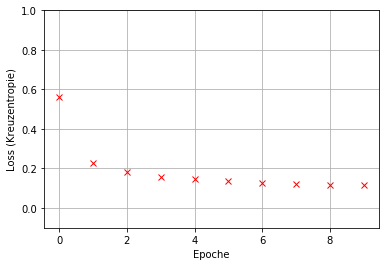

In [14]:
np.random.seed(6)
weight = np.random.rand(2,2)
bias = np.random.rand(2,1)

m = (weight[1,0] - weight[0,0]) / (weight[0,1] - weight[1,1])
b = (bias[1] - bias[0]) / (weight[0,1] - weight[1,1])
x = np.arange(-15,20,1)

fig, ax = plt.subplots(2,2,sharex=True,sharey=True, figsize=(8,6))
fig.suptitle('Mini Batch Learning')
ax[0,0].scatter(X.T[0], X.T[1], c=np.argmax(y, axis=1), alpha = 0.5)
ax[0,1].scatter(X.T[0], X.T[1], c=np.argmax(y, axis=1), alpha = 0.5)
ax[1,0].scatter(X.T[0], X.T[1], c=np.argmax(y, axis=1), alpha = 0.5)
ax[1,1].scatter(X.T[0], X.T[1], c=np.argmax(y, axis=1), alpha = 0.5)
ax[0,0].set_ylim(-10,15)
ax[0,0].plot(x, m*x+b, label='Random')
ax[0,0].legend()

periods = 10
learning_rate = .5
Loss = []

for period in range(periods):
    if period == 1 or period==3:
        W_corr = np.array([[0.,0.],[0.,0.]])
        b_corr = np.array([[0.0],[0.0]])
        loss = 0
        for i in range(0, int(len(populations)/4)):
            W_corr += grad_W_C(X[i], y[i])
            b_corr += grad_b_C(X[i], y[i])
            loss += sum(-y[i].reshape(2,1)*np.log(softmax(weight, X[i], bias)))
        weight = weight - 1/len(populations)*learning_rate * W_corr
        bias = bias - 1/len(populations)*learning_rate * b_corr
        W_corr = np.array([[0.,0.],[0.,0.]])
        b_corr = np.array([[0.0],[0.0]])
        for i in range(int(len(populations)/4), int(2*len(populations)/4)):
            W_corr += grad_W_C(X[i], y[i])
            b_corr += grad_b_C(X[i], y[i])
            loss += sum(-y[i].reshape(2,1)*np.log(softmax(weight, X[i], bias)))
        weight = weight - 1/len(populations)*learning_rate * W_corr
        bias = bias - 1/len(populations)*learning_rate * b_corr
        W_corr = np.array([[0.,0.],[0.,0.]])
        b_corr = np.array([[0.0],[0.0]])
        for i in range(int(2*len(populations)/4), int(3*len(populations)/4)):
            W_corr += grad_W_C(X[i], y[i])
            b_corr += grad_b_C(X[i], y[i])
            loss += sum(-y[i].reshape(2,1)*np.log(softmax(weight, X[i], bias)))
        weight = weight - 1/len(populations)*learning_rate * W_corr
        bias = bias - 1/len(populations)*learning_rate * b_corr
        W_corr = np.array([[0.,0.],[0.,0.]])
        b_corr = np.array([[0.0],[0.0]])
        m = (weight[1,0] - weight[0,0]) / (weight[0,1] - weight[1,1])
        b = (bias[1] - bias[0]) / (weight[0,1] - weight[1,1])
        x = np.arange(-15,20,1)
        for i in range(int(3*len(populations)/4), int(len(populations))):
            W_corr += grad_W_C(X[i], y[i])
            b_corr += grad_b_C(X[i], y[i])
            loss += sum(-y[i].reshape(2,1)*np.log(softmax(weight, X[i], bias)))
        weight = weight - 1/len(populations)*learning_rate * W_corr
        bias = bias - 1/len(populations)*learning_rate * b_corr
        W_corr = np.array([[0.,0.],[0.,0.]])
        b_corr = np.array([[0.0],[0.0]])
        Loss.append(1/len(populations)* loss)
        if period ==1:
            ax[0,1].plot(x, m*x+b, label=period+1)
            ax[0,1].legend()
            print('Periode {} abgeschlossen.' .format(period+1))
        else: 
            ax[1,0].plot(x, m*x+b, label=period+1)
            ax[1,0].legend()
            print('Periode {} abgeschlossen.' .format(period+1))
    else:
        W_corr = np.array([[0.,0.],[0.,0.]])
        b_corr = np.array([[0.0],[0.0]])
        loss = 0
        for i in range(0, int(len(populations)/4)):
            W_corr += grad_W_C(X[i], y[i])
            b_corr += grad_b_C(X[i], y[i])
            loss += sum(-y[i].reshape(2,1)*np.log(softmax(weight, X[i], bias)))
        weight = weight - 1/len(populations)*learning_rate * W_corr
        bias = bias - 1/len(populations)*learning_rate * b_corr
        W_corr = np.array([[0.,0.],[0.,0.]])
        b_corr = np.array([[0.0],[0.0]])
        for i in range(int(len(populations)/4), int(2*len(populations)/4)):
            W_corr += grad_W_C(X[i], y[i])
            b_corr += grad_b_C(X[i], y[i])
            loss += sum(-y[i].reshape(2,1)*np.log(softmax(weight, X[i], bias)))
        weight = weight - 1/len(populations)*learning_rate * W_corr
        bias = bias - 1/len(populations)*learning_rate * b_corr
        W_corr = np.array([[0.,0.],[0.,0.]])
        b_corr = np.array([[0.0],[0.0]])
        for i in range(int(2*len(populations)/4), int(3*len(populations)/4)):
            W_corr += grad_W_C(X[i], y[i])
            b_corr += grad_b_C(X[i], y[i])
            loss += sum(-y[i].reshape(2,1)*np.log(softmax(weight, X[i], bias)))
        weight = weight - 1/len(populations)*learning_rate * W_corr
        bias = bias - 1/len(populations)*learning_rate * b_corr
        W_corr = np.array([[0.,0.],[0.,0.]])
        b_corr = np.array([[0.0],[0.0]])
        m = (weight[1,0] - weight[0,0]) / (weight[0,1] - weight[1,1])
        b = (bias[1] - bias[0]) / (weight[0,1] - weight[1,1])
        x = np.arange(-15,20,1)
        for i in range(int(3*len(populations)/4), int(len(populations))):
            W_corr += grad_W_C(X[i], y[i])
            b_corr += grad_b_C(X[i], y[i])
            loss += sum(-y[i].reshape(2,1)*np.log(softmax(weight, X[i], bias)))
        weight = weight - 1/len(populations)*learning_rate * W_corr
        bias = bias - 1/len(populations)*learning_rate * b_corr
        W_corr = np.array([[0.,0.],[0.,0.]])
        b_corr = np.array([[0.0],[0.0]])
        Loss.append(1/len(populations)* loss)
        print('Periode {} abgeschlossen.' .format(period+1))
m = (weight[1,0] - weight[0,0]) / (weight[0,1] - weight[1,1])
b = (bias[1] - bias[0]) / (weight[0,1] - weight[1,1])
x = np.arange(-15,20,1)
ax[1,1].plot(x, m*x+b, label=period+1)
ax[1,1].legend()
plt.show()

plt.plot(Loss, 'rx')
plt.grid()
plt.xlabel('Epoche')
plt.ylabel('Loss (Kreuzentropie)')
plt.ylim(-.1,1)
print('Learning Rate: {}, \n Loss: {}.'.format(learning_rate, Loss[-1]))